# **ĐỒ ÁN**

## **LỚP: DHKHDL15A**
## **MÔN: MACHINE LEARNING - GIẢNG VIÊN: PGS.TS NGUYỄN VIỆT LINH**



## **ĐỀ TÀI: ỨNG DỤNG HỌC SÂU NHẬN DẠNG BẢNG CHỮ CÁI NGÔN NGỮ KÍ HIỆU HOA KÌ**




### **THÀNH VIÊN**


1. **Hà Bảo Anh - 19442001** *Nhóm trưởng*
  
2. **Lưu Thị Yến Nhi - 19522491**

3. **Thái Thị Hiền - 19527801**

4. **Hồ Quang Huy - 19443561**

5. **Phan Lê Hoàng Việt - 19512321**




# **Tổng quan**


  Ngôn ngữ ký hiệu Hoa Kì (ASL) là ngôn ngữ dấu hiệu nhằm tạo điều kiện giao tiếp trong cộng đồng người khiếm thính và được sử dụng nhiều trong việc giao tiếp ngôn ngữ giữa những người khiếm thính. Tuy nhiên, với số lượng ít những người bình thường biết đến và hiểu được loại ngôn ngữ này đang là trở ngại giao tiếp của những người khiếm thính. Để giải quyết vấn đề này đã có nhiều hệ thống nhận diện ngôn ngữ ký hiệu ứng dụng thị giác máy tính(Computer Vision).

  Trong bài nghiên cứu này, chúng tôi sử dụng các mô hình học sâu để xử lý và phân loại tập dữ liệu hình ảnh về ngôn ngữ ký hiệu ASL nhằm đánh giá và so sánh các mô hình trong việc nhận diện hình ảnh ngôn ngữ ký hiệu.

  Một số vấn đề đặt ra trong quá trình ứng dụng các mô hình trong việc xử lý và phân loại hình ảnh:
  * Dữ liệu nhiều.
  * Môi trường hình ảnh(Độ sáng, vị trí bàn tay).
  * Tư thế của bàn tay(Vị trí, chuyển động và hướng).


# **Mục tiêu - phương pháp**








## **Mục tiêu**
  - Nghiên cứu về xử lý ảnh và phân loại ảnh.
  - Giới thiệu về mạng neural trong phân loại hình ảnh sử dụng mạng CNN.
  - Áp dụng các mạng CNN vào bài toán phân loại ảnh ngôn ngữ kí hiệu.



## **Phương pháp**


### **Dữ liệu**:


- Tên bộ dữ liệu: Tập dữ liệu hình ảnh về ngôn ngữ ký hiệu.(asl_alphabet)
- Nguồn: Thu thập trên kaggle https://www.kaggle.com/grassknoted/asl-alphabet

In [ ]:
!unzip "/content/drive/MyDrive/Do_an_ML-team-Thinking/data_set/asl_alphabet_train.zip"
!unzip "/content/drive/MyDrive/Do_an_ML-team-Thinking/data_set/asl_alphabet_test.zip"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: asl_alphabet_train/B/B1391.jpg  
  inflating: asl_alphabet_train/B/B139.jpg  
  inflating: asl_alphabet_train/B/B1388.jpg  
  inflating: asl_alphabet_train/B/B1387.jpg  
  inflating: asl_alphabet_train/B/B1383.jpg  
  inflating: asl_alphabet_train/B/B1382.jpg  
  inflating: asl_alphabet_train/B/B1381.jpg  
  inflating: asl_alphabet_train/B/B1379.jpg  
  inflating: asl_alphabet_train/B/B1373.jpg  
  inflating: asl_alphabet_train/B/B137.jpg  
  inflating: asl_alphabet_train/B/B1367.jpg  
  inflating: asl_alphabet_train/B/B1365.jpg  
  inflating: asl_alphabet_train/B/B1364.jpg  
  inflating: asl_alphabet_train/B/B1363.jpg  
  inflating: asl_alphabet_train/B/B1359.jpg  
  inflating: asl_alphabet_train/B/B1358.jpg  
  inflating: asl_alphabet_train/B/B1356.jpg  
  inflating: asl_alphabet_train/B/B1350.jpg  
  inflating: asl_alphabet_train/B/B1347.jpg  
  inflating: asl_alphabet_train/B/B1341.jpg  
  inflating: asl_alphabet

In [ ]:
train_dir = "/content/asl_alphabet_train"
val_dir = "/content/asl_alphabet_test"

- **Số lượng**
  - Tập dữ liệu gồm *87000* ảnh được chia thành 29 folder, mỗi folder là 1 lớp bao gồm 26 lớp (A->Z) và 3 lớp("nothing","del","space"), được chia thành 2 tập training gồm *69600* ảnh và validation *17400* ảnh
  - Tập test gồm 29 hình ảnh đại diện cho 29 lớp

In [ ]:
import os
import cv2
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

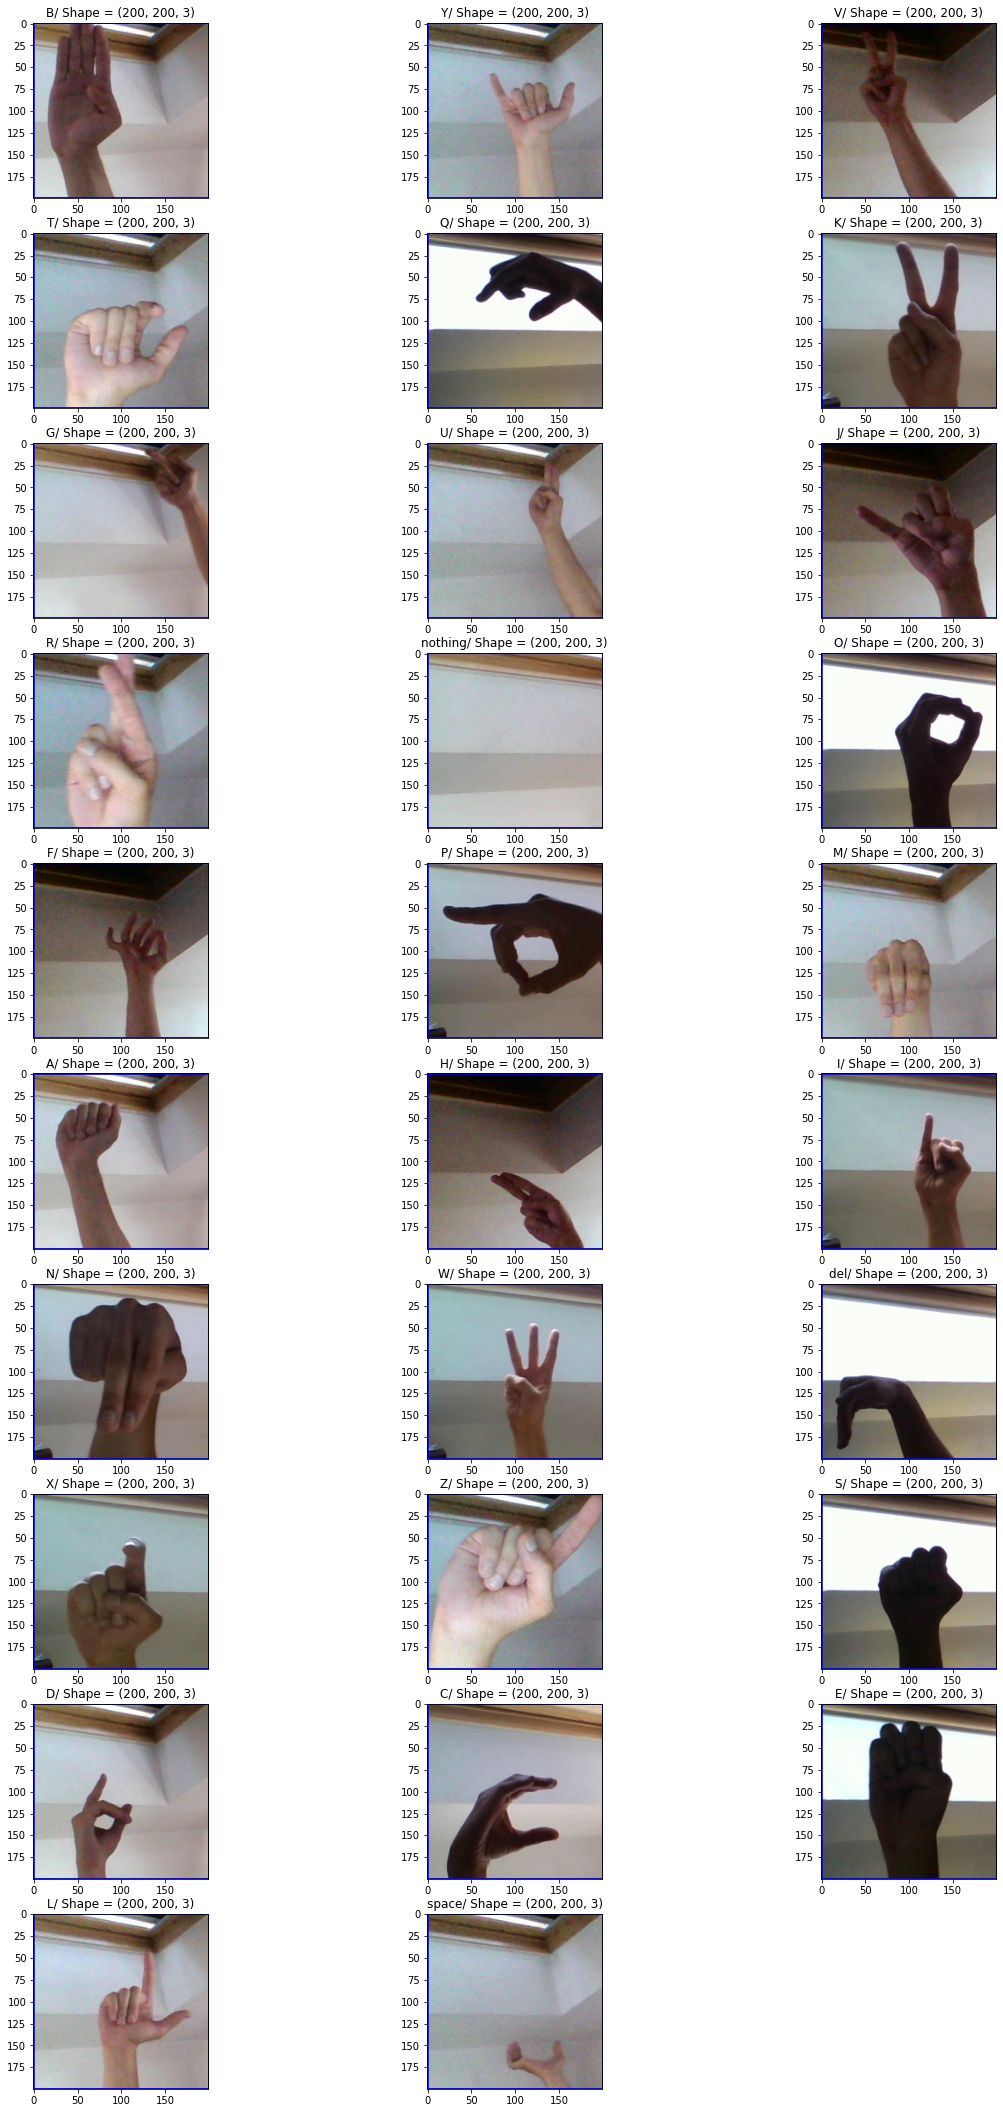

In [ ]:
dir = "/content/asl_alphabet_train/"
classes = os.listdir(dir)
# Visualizations
plt.figure(figsize=(20,38))
for i in enumerate(classes):
    image = os.listdir(dir+i[1])[0]
    image = Image.open(dir+i[1]+'/'+image)
    image = np.asarray(image)
    plt.subplot(10,3,i[0]+1)
    plt.imshow(image)
    plt.title('{0}/ Shape = {1}'.format(i[1], image.shape))
plt.show()

- **Loại**
  - Size ảnh ban đầu: 200x200 dimensions,
  - Size qua xử lý: giản ảnh ra 224x224 dimensions, mục đích nhằm phù hợp với mô hình.
  - Tensor: Số thực là dữ liệu 0D, vector 1D, ma trận 2D còn dữ liệu từ 3D trở đi được gọi là **tensor**.
  - Kênh màu ban đầu: RGB
      


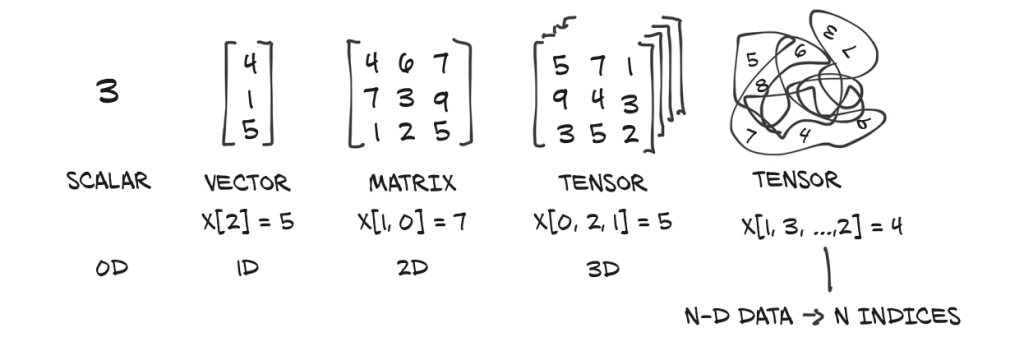

## **Tiền xử lý và chia train test tập dữ liệu**

In [ ]:
batch_size = 128
img_height = 227
img_width = 227
CLASS_NUM = 29
train_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset="training",
    seed=123,
    shuffle=True
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset="validation",
    seed=123,
    shuffle=False
)
EPOCH_STEPS_TRAIN = int(69600/batch_size)
EPOCH_STEPS_VAL = int(17400/batch_size)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [ ]:
class_names = train_generator.class_indices.keys()
class_names

dict_keys(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'])

- Sử dụng thư viện mã nguồn mở **Tensorflow** được phát triển bởi các nhà nghiên cứu từ Google hỗ trợ mạnh mẽ các phép toán học để tính toán trong machine learning và deep learning.

-  Ý nghĩa của các tham số trong hàm ImageDataGenerator()

  - **rescale**: Là hệ số thay đổi tỷ lệ. Mặc định là None. Nếu None hoặc 0, không có thay đổi tỷ lệ nào được áp dụng, ngược lại, chúng tôi nhân dữ liệu với giá trị được cung cấp (sau khi áp dụng tất cả các phép biến đổi khác)

  - **validation_split**: Có kiểu float, nằm trong khoảng [0,1]. Một phần của dữ liệu huấn luyện sẽ được sử dụng làm dữ liệu xác thực. Mô hình sẽ tách biệt phần này của dữ liệu đào tạo, sẽ không đào tạo trên đó và sẽ đánh giá tổn thất và bất kỳ số liệu mô hình nào trên dữ liệu này vào cuối mỗi kỷ nguyên. Dữ liệu xác thực được chọn từ các mẫu cuối cùng trong dữ liệu x và y được cung cấp, trước khi xáo trộn
  
  - **shear_range:** Làm méo ảnh

  - **preprocessing_function:** Chức năng này sẽ được áp dụng trên mỗi đầu vào. Nó  sẽ chạy sau khi hình ảnh được thay đổi kích thước. Hàm phải nhận một đối số: một hình ảnh (tensor Numpy có hạng 3) và phải xuất ra tensor Numpy có cùng hình dạng.

  - **horizontal_flip:** Có kiểu là boolean.Lật ảnh ngầu nhiên đầu vào theo chiều ngang

  - **zoom_range:** Thực hiện zoom ngầu nhiên trong một phạm vi nào đó

  - **brightness_range:** Tăng cường độ sáng của ảnh trong một phạm vi nào đó
  
  - **rotation_range:** Xoay ảnh góc tối đa là 45 độ



- Các thuộc tính được sử dụng phổ biến với flow_from_directory():

  - **directory:** phải đặt đường dẫn có các classes của folder

  - **batch_size:** Số lượng ảnh được chia
   từ generator cho mỗi lô batch

  - **taget_size:** là kích thước của các ảnh đầu vào, mỗi ảnh sẽ được thay đổi kích thước theo kích thước này
      
  - **class_mode:** Đặt *binary* nếu bạn có 2 lớp để dự đoán, nếu không thì mặc định là *categorical*(phân loại). trong trường hợp nếu bạn đang lập trình một hệ thống tự động Autoencoder, thì cả đầu vào và đầu ra đều là ảnh, trong trường hợp này thì bạn đặt là "input"
      
  - **shuffle(True):** đặt *True* nếu bạn muốn đổi thứ tự hình ảnh, ngược lại đặt *False* 
      
  - **color_mode:** Nếu hình ảnh là màu đen trắng hoặc là ảnh xám thì đặt *grayscale* nếu không thì mặc định là *rgb*

  - **seed:** Để áp dụng tăng hình ảnh ngẫu nhiên và xáo trộn thứ tự của hình ảnh
    

## **Mạng CNN**


- Kiến trúc cơ bản của mạng CNN
-Có hai phần chính trong kiến trúc CNN:
-- Một là phần phân tích và nhận dạng các đặc điểm khác nhau của một ảnh trong quá trình xử lý được gọi là trích xuất đặc trưng (Feature Extraction).
-- Hai là lớp được kết nối đầy đủ sử dụng đầu ra của quá trình tích chập và dự đoán hình ảnh dựa trên các đặc trưng được trích xuất ở giai đoạn trước được gọi là phân loại (Classification) [1].

  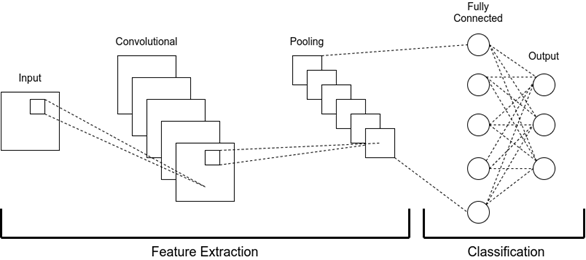

- Kiến trúc CNN được cấu thành từ ba layer đó là convolutional layer, pooling layer và fully connected layer (FC). Các layer này được xếp chồng lên nhau thành một kiến trúc CNN. Ngoài ba layer này còn có hai tham số quan trọng đó là dropout và hàm kích hoạt (activation function) [1], được định nghĩa bên dưới.


### **Convolution Layer**
- Đây là layer đầu tiên dùng để trích xuất các đặc trưng khác nhau của ảnh đầu vào, Ở layer này, thực hiện phép toán tích chập giữa ảnh đầu vào với một bộ lọc có kích thước MxM, bằng cách trượt bộ lọc dọc theo ảnh đầu vào [1].

- Đầu ra được gọi là feature map, cung cấp cho chúng ta thông tin của ảnh như góc và cạnh. Feature map này sẽ được đưa đến các layer khác để học thêm nhiều đặc trưng khác của ảnh đầu vào.

- Ví dụ: Xem xét 1 ma trận 5 x 5 có giá trị pixel là 0 và 1. Ma trận bộ lọc 3 x 3 như hình bên dưới.
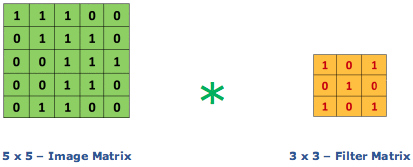

  Sau đó, lớp tích chập của ma trận hình ảnh 5 x 5 nhân với ma trận bộ lọc 3 x 3 gọi là 'Feature Map' như hình bên dưới.
  
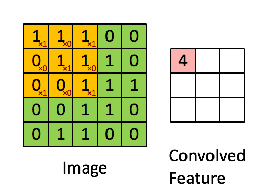





> **Padding**
- Như ở trên thì mỗi lần thực hiện phép tính convolution xong thì kích thước ma trận Y đều nhỏ hơn X. Tuy nhiên giờ ta muốn ma trận Y thu được có kích thước bằng ma trận X => Tìm cách giải quyết cho các phần tử ở viền => Thêm giá trị 0 ở viền ngoài ma trận X

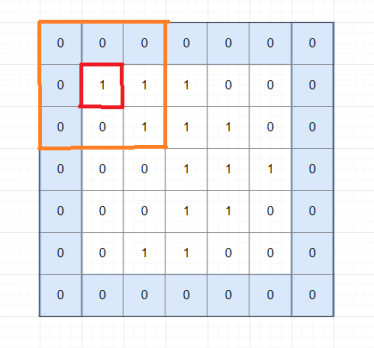
    
- Rõ ràng là giờ đã giải quyết được vấn đề tìm A cho phần tử $x_{11}$​ , và ma trận Y thu được sẽ bằng kích thước ma trận X ban đầu.

- Phép tính này gọi là convolution với padding=1. Padding=k nghĩa là thêm k vector 0 vào mỗi phía của ma trận.
   
       


    
    
    



    


> **Stride**
- Như ở trên ta thực hiện tuần tự các phần tử trong ma trận X, thu được ma trận Y cùng kích thước ma trận X, ta gọi là stride=1

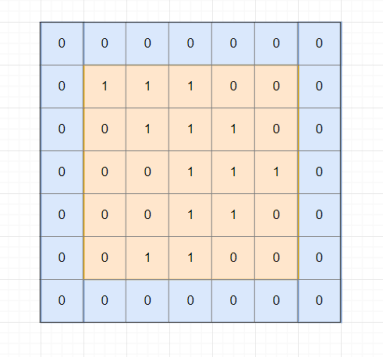

- Tuy nhiên nếu stride=k (k > 1) thì ta chỉ thực hiện phép tính convolution trên các phần tử $x_{1+i*k,1+j*k}$
​

  - Ví dụ k = 2.(padding=1, stride=2)
  
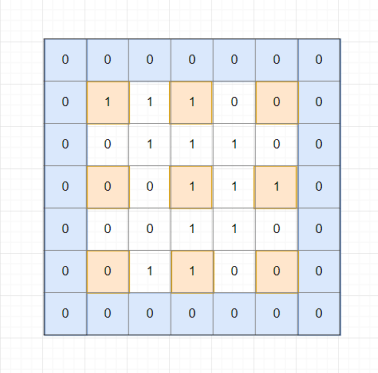

> **Hàm phi tuyến - ReLU**
- ReLU viết tắt của Rectified Linear Unit, là 1 hàm phi tuyến. Với đầu ra là: ƒ (x) = max (0, x).
- ReLU giới thiệu tính phi tuyến trong ConvNet. Vì dữ liệu trong thế giới mà chúng ta tìm hiểu là các giá trị tuyến tính không âm. Vì thế nên ReLU rất quan trọng

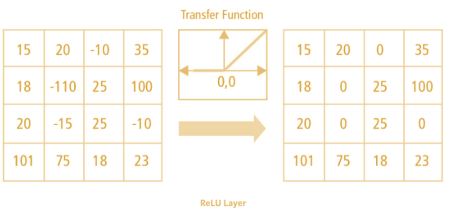

  - Có 1 số hàm phi tuyến khác như tanh, sigmoid cũng có thể được sử dụng thay cho ReLU. Hầu hết người ta thường dùng ReLU vì nó có hiệu suất tốt

### **Pooling Layer**
- Hầu hết các trường hợp, theo sau một convolutional layer là một pooling layer.

- Mục đích chính của layer này là giảm kích thước của feature map để giảm chi phí tính toán. Điều này được thực hiện bằng cách giảm kết nối giữa các layer. Ta có một số loại pooling layer thường dùng như: max-pooling sẽ lấy phần tử lớn nhất trong bộ lọc kích thước MxM trên feature map, average pooling sẽ lấy trung bình các phần tử trong bộ lọc kích thước MxM trên feature map, sum pooling là tính tổng các phần tử trong bộ lọc kích thước MxM trên feature map. Pooling layer thường là đóng vai trò là cầu nối với fully connected layer (FC) [1].

- **VÍ dụ về Max Pooling**
  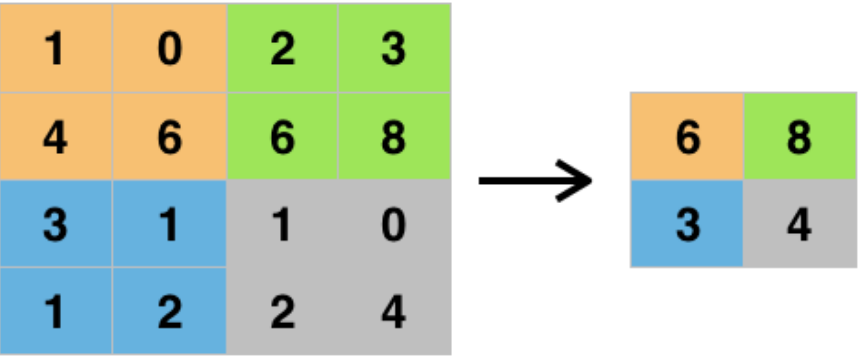


- **Ví dụ về Average Pooling**

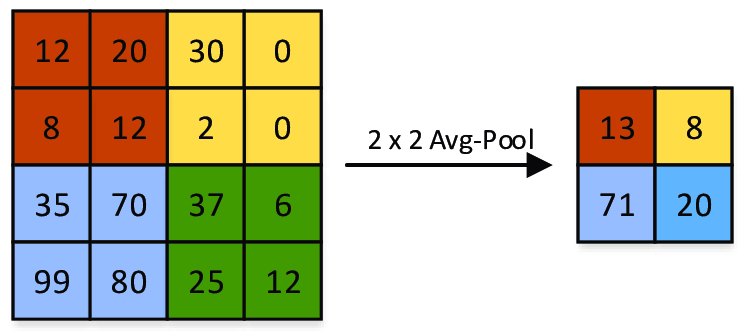

### **Fully connected layer**
- Layer này bao gồm các weight và bias cùng với các nơron và được sử dụng để kết nối các nơron ở 2 layer khác nhau. Các layer này thường được đặt trước các layer đầu ra và tạo thành một số layer cuối cùng của kiến trúc CNN.

- Trong đó, hình ảnh đầu vào từ các lớp trước đó được làm phẳng (flatten) và đưa vào fully connected layer (FC). Sau đó vector được làm phẳng trải qua một vài lớp FC nữa. Trong giai đoạn này quá trình phân loại bắt đầu diễn ra [1].

### **Dropout layer**
- Thông thường, khi các đặc trưng kết nối với fully connected layer, điều này dẫn đến overfitting trên dữ liệu huấn luyện. Overfitting xảy ra khi mô hình hoạt động tốt trên dữ liệu huấn luyện tuy nhiên hoạt động tệ trên dữ liệu mới [1].

- Để khắc phục vấn đề này là sử dụng dropout layer, bằng cách loại bỏ một số nơron khỏi quá trình huấn luyện, điều này còn làm giảm kích thước của mô hình. Nếu ta cho loại bỏ 0.3, có nghĩa là 30% số nơron sẽ được loại bỏ ngẫu nhiên khỏi mạng lưới nơron.


> **Activation functions:**
- Cuối cùng, một tham số quan trọng nhất trong mô hình CNN đó là activation function.
- Một cách đơn giản, có thể hiểu activation function được thêm vào mô hình giúp cho chúng có thể học được những dữ liệu phức tạp. Activation function nằm ở cuối và quyết định xem những gì sẽ được kích hoạt đến nơron tiếp theo. Nó nhận đầu ra từ ô trước đó và chuyển đổi về một số dạng có thể được lấy làm đầu vào cho ô tiếp theo, nó thêm tính phi tuyến tính vào mạng [1]. 
- Có một số activation function thông dụng như *ReLU*, *Softmax*, *Tanh* và Sigmoid, mỗi function đều có một công dụng cụ thể.

## **Các mô hình CNN được sử dụng**


> Ở đây các mô hình CNN phổ biến được sử dụng như AlexNet, ResNet50 và chọn ra mô hình tối ưu nhất về thời gian huấn luyện cũng như độ chính xác thu được.

> Tất cả những kiến trúc bên dưới đều được hiện thực bằng keras và huấn luyện với hàm mất mát là categorical cross entropy, hàm tối ưu là Adam[4] và các thông số giống nhau là: 
  - batch size bằng 128
  - learning rate bằng 0.001 
  - epoch bằng 50
  - Được huấn luyện trên Kaggle với RAM là 13GB, ổ đĩa 73.1GB và miễn phí GPU Tesla P100-PCIE-16GB.

### **AlexNet**







#### **Cấu trúc mạng AlexNet**
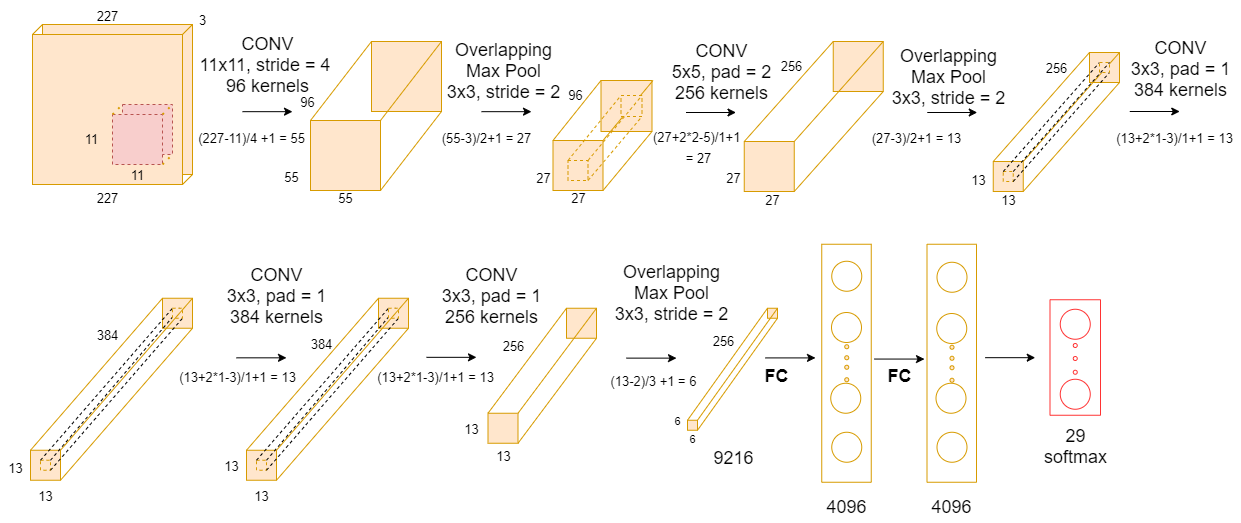

- Mô hình này đã tham gia cuộc thi *ImageNet Large Scale Visual Recognition Challenge 2012 (ILSVRC 2012)* được gọi với tên phổ biến là AlexNet theo tên của tác giả đầu tiên là *Alex Krizhevsky* [2].

- Đầu vào của AlexNet là 1 ảnh RGB với kích thước 227x227x3 nên cần thay thế kích thước là 227x227x3 cho cả tập dữ liệu huấn luyện và kiểm thử. Nếu đầu vào là ảnh xám thì cần phải chuyển lại thành ảnh RGB [2].

- Mạng AlexNet có khoảng 56 triệu tham số và 650.000 neurons bao gồm 5 lớp convolutional, 1 trong số đó được theo sau bởi lớp max-pooling, và 3 lớp fully-connected, cuối cùng là 1 hàm softmax cho ra xác suất của ảnh thuộc về 29 lớp (A-Z, del, nothing, space) của của dữ liệu [2].

- Để giảm overfitting các tác giả đã thêm 1 phương thức regularization được gọi là "dropout" vào lớp Convolutional [2].

## **ResNet50**

- Kiến trúc này tham gia trong cuộc thi *ImageNet Large Scale Visual Recognition Challenge 2015 (ILSVRC 2015)* với tác giả đầu tiên là *Kaiming He*.
- Đầu vào của ResNet50 là một ảnh RGB với kích thước 224x224x3 cho cả tập dữ liệu huấn luyện và kiểm thử. Nếu đầu vào là ảnh xám thì cần phải chuyển lại thành ảnh RGB.
- ResNet là mô hình đầu tiên giới thiệu về khái niệm skip connection [3], với hình bên trái thì các lớp xếp chồng lên nhau và hình bên phải cũng tương tự nhưng có thêm một kết nối từ đầu vào đến đầu ra của khối convolutional gọi là skip connection được thể hiện ở Hình.
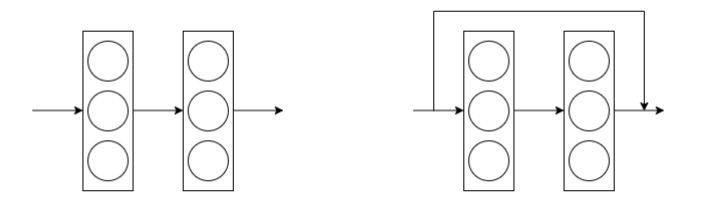
- Skip connection trong ResNet có 2 dạng là: identity và convolutional.
Identity có dạng kết nối từ đầu vào tới đầu ra của khối như Hình dưới
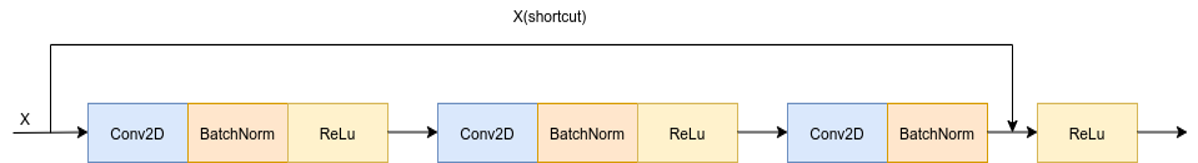
- Convolutional có dạng kết nối từ đầu vào tới đầu ra của khối nhưng ở giữa sẽ có thêm một khối convolutional như Hình dưới.
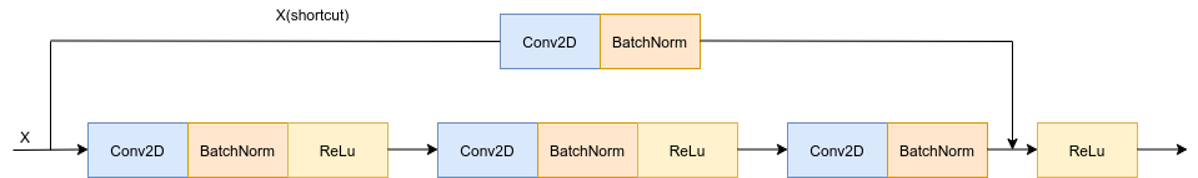
- Mô hình ResNet50 có khoảng 32 triệu tham số gồm năm giai đoạn với mỗi giai đoạn từ hai tới năm đều có khối identity và convolutional. Cấu trúc của mạng được thể hiện ở mô hình bên dưới.
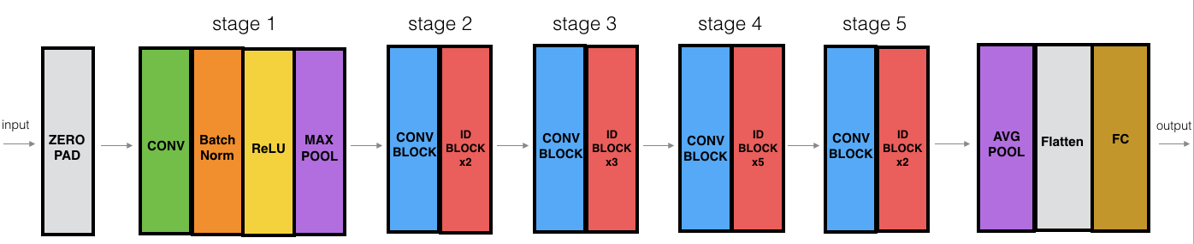
- ResNet50 gần như tương tự với các mạng khác gồm có convolution, pooling, activation và fully-connected layer. Năm giai đoạn tương ứng với năm lớp tích chập (Convolutional Layers), theo sau đó là tầng max-pooling có kích thước 2x2 cùng với lớp làm phẳng (Flatten).
Kết quả là một đầu ra 29 lớp cần phân loại [3].





# **Kết quả - thảo luận**

- Các mô hình được đề cập ở Phương pháp được hiện thực trên platform **Kaggle**
- Python phiên bản 3.7.10
- Tensorflow phiên bản 2.6.0
- Opencv phiên bản 4.5.4
- Numpy phiên bản 1.19.5
- Pillow phiên bản 8.2.0



- Sử dụng **Confusion matrix** để có thể đánh giá cụ thể mỗi loại được phân loại như thế nào, lớp nào được phân loại đúng nhiều nhất và dữ liệu lớp nào thường bị phân loại nhầm vào lớp khác.
- **Precision**: tỉ lệ số lượng ảnh cử chỉ đúng được phân loại đúng trong số lượng ảnh được phân loại là lớp của cử chỉ tay đó.
$$Precision = \frac{TP}{TP+FP}$$
- **Recall**: tỉ lệ số lượng ảnh đúng được phân loại đúng trong số lượng ảnh thực sự đúng là cử chỉ tay đó.
$$Recall = \frac{TP}{TP+FN}$$
- **F1-score**: là điểm trung bình hài hòa của precision và recall được tính bằng công thức:
$$F1 = 2*\frac{(Precision*Recall)}{(Precision+Recall)}$$

### **Kết quả mô hình AlexNet**



```
Epoch 1/50- loss: 2.4915 - accuracy: 0.3657 - val_loss: 2.7785 - val_accuracy: 0.2880
Epoch 2/50- 268s 493ms/step - loss: 1.3622 - accuracy: 0.5834 - val_loss: 3.3885 - val_accuracy: 0.2936
Epoch 3/50- 271s 498ms/step - loss: 0.9583 - accuracy: 0.7058 - val_loss: 4.8842 - val_accuracy: 0.3119
Epoch 4/50- 266s 490ms/step - loss: 0.7276 - accuracy: 0.7863 - val_loss: 1.3783 - val_accuracy: 0.5972
Epoch 5/50- 268s 493ms/step - loss: 0.5177 - accuracy: 0.8503 - val_loss: 25.0771 - val_accuracy: 0.2380
Epoch 6/50- 269s 495ms/step - loss: 0.3938 - accuracy: 0.8902 - val_loss: 2.4336 - val_accuracy: 0.5058
Epoch 7/50- 275s 507ms/step - loss: 0.2748 - accuracy: 0.9273 - val_loss: 4.3517 - val_accuracy: 0.4917
Epoch 8/50- 314s 578ms/step - loss: 0.2243 - accuracy: 0.9434 - val_loss: 2.9228 - val_accuracy: 0.4795
Epoch 9/50- 296s 546ms/step - loss: 0.1888 - accuracy: 0.9565 - val_loss: 1.5864 - val_accuracy: 0.6627
Epoch 10/50- 274s 505ms/step - loss: 0.1666 - accuracy: 0.9637 - val_loss: 0.9780 - val_accuracy: 0.7479
Epoch 11/50- 276s 507ms/step - loss: 0.1176 - accuracy: 0.9744 - val_loss: 2.8398 - val_accuracy: 0.6296
Epoch 12/50- 300s 552ms/step - loss: 0.1000 - accuracy: 0.9791 - val_loss: 3.6799 - val_accuracy: 0.5748
Epoch 13/50- 275s 507ms/step - loss: 0.1083 - accuracy: 0.9796 - val_loss: 2.9163 - val_accuracy: 0.6286
Epoch 14/50- 278s 512ms/step - loss: 0.1282 - accuracy: 0.9779 - val_loss: 0.9014 - val_accuracy: 0.8215
Epoch 15/50- 271s 499ms/step - loss: 0.0741 - accuracy: 0.9857 - val_loss: 1.8349 - val_accuracy: 0.7433
Epoch 16/50- 271s 499ms/step - loss: 0.0739 - accuracy: 0.9871 - val_loss: 1.7204 - val_accuracy: 0.7528
Epoch 17/50- 273s 502ms/step - loss: 0.0776 - accuracy: 0.9869 - val_loss: 4.6321 - val_accuracy: 0.5301
Epoch 18/50- 277s 509ms/step - loss: 0.0978 - accuracy: 0.9852 - val_loss: 2.7186 - val_accuracy: 0.7011
Epoch 19/50- 269s 495ms/step - loss: 0.0872 - accuracy: 0.9862 - val_loss: 0.9103 - val_accuracy: 0.8497
Epoch 20/50- 266s 490ms/step - loss: 0.0529 - accuracy: 0.9911 - val_loss: 1.5166 - val_accuracy: 0.7897
Epoch 21/50- 266s 489ms/step - loss: 0.0533 - accuracy: 0.9915 - val_loss: 2.4452 - val_accuracy: 0.6782
Epoch 22/50- 283s 521ms/step - loss: 0.0545 - accuracy: 0.9919 - val_loss: 2.5287 - val_accuracy: 0.7364
Epoch 23/50- 266s 489ms/step - loss: 0.0556 - accuracy: 0.9920 - val_loss: 2.6140 - val_accuracy: 0.7911
Epoch 24/50- 269s 496ms/step - loss: 0.0848 - accuracy: 0.9892 - val_loss: 2.2002 - val_accuracy: 0.6486
Epoch 25/50- 269s 495ms/step - loss: 0.0444 - accuracy: 0.9935 - val_loss: 1.4593 - val_accuracy: 0.7899
Epoch 26/50- 277s 510ms/step - loss: 0.0619 - accuracy: 0.9920 - val_loss: 2.3553 - val_accuracy: 0.8223
Epoch 27/50- 273s 503ms/step - loss: 0.0498 - accuracy: 0.9940 - val_loss: 2.9979 - val_accuracy: 0.7652
Epoch 28/50- 274s 505ms/step - loss: 0.0539 - accuracy: 0.9937 - val_loss: 3.6830 - val_accuracy: 0.6631
Epoch 29/50- 275s 506ms/step - loss: 0.0515 - accuracy: 0.9945 - val_loss: 4.9361 - val_accuracy: 0.6977
Epoch 30/50- 275s 507ms/step - loss: 0.0395 - accuracy: 0.9947 - val_loss: 2.4926 - val_accuracy: 0.7687
Epoch 31/50- 275s 506ms/step - loss: 0.0533 - accuracy: 0.9938 - val_loss: 2.4730 - val_accuracy: 0.6348
Epoch 32/50- 277s 509ms/step - loss: 0.0580 - accuracy: 0.9936 - val_loss: 1.8364 - val_accuracy: 0.8393
Epoch 33/50- 276s 509ms/step - loss: 0.0472 - accuracy: 0.9949 - val_loss: 1.9914 - val_accuracy: 0.8517
Epoch 34/50- 283s 521ms/step - loss: 0.0378 - accuracy: 0.9958 - val_loss: 1.6917 - val_accuracy: 0.8344
Epoch 35/50- 277s 510ms/step - loss: 0.0479 - accuracy: 0.9947 - val_loss: 1.4096 - val_accuracy: 0.8406
Epoch 36/50- 273s 502ms/step - loss: 0.0493 - accuracy: 0.9943 - val_loss: 2.2031 - val_accuracy: 0.7562
Epoch 37/50- 272s 502ms/step - loss: 0.0370 - accuracy: 0.9960 - val_loss: 2.8833 - val_accuracy: 0.8289
Epoch 38/50- 303s 557ms/step - loss: 0.0438 - accuracy: 0.9961 - val_loss: 6.7936 - val_accuracy: 0.6078
Epoch 39/50- 268s 494ms/step - loss: 0.0649 - accuracy: 0.9942 - val_loss: 11.1551 - val_accuracy: 0.6053
Epoch 40/50- 270s 498ms/step - loss: 0.0426 - accuracy: 0.9959 - val_loss: 2.2436 - val_accuracy: 0.7495
Epoch 41/50- 272s 500ms/step - loss: 0.0322 - accuracy: 0.9965 - val_loss: 1.9888 - val_accuracy: 0.8524
Epoch 42/50- 296s 545ms/step - loss: 0.0751 - accuracy: 0.9944 - val_loss: 4.0949 - val_accuracy: 0.6253
Epoch 43/50- 271s 500ms/step - loss: 0.0428 - accuracy: 0.9963 - val_loss: 4.3748 - val_accuracy: 0.6547
Epoch 44/50- 272s 502ms/step - loss: 0.0325 - accuracy: 0.9970 - val_loss: 2.0065 - val_accuracy: 0.8430
Epoch 45/50- 272s 501ms/step - loss: 0.0238 - accuracy: 0.9973 - val_loss: 2.1298 - val_accuracy: 0.8615
Epoch 46/50- 272s 501ms/step - loss: 0.0554 - accuracy: 0.9958 - val_loss: 4.0697 - val_accuracy: 0.7970
Epoch 47/50- 272s 501ms/step - loss: 0.0537 - accuracy: 0.9960 - val_loss: 2.9191 - val_accuracy: 0.8000
Epoch 48/50- 273s 502ms/step - loss: 0.0661 - accuracy: 0.9956 - val_loss: 5.2430 - val_accuracy: 0.7919
Epoch 49/50- 277s 510ms/step - loss: 0.0512 - accuracy: 0.9970 - val_loss: 3.2018 - val_accuracy: 0.8637
Epoch 50/50- 276s 508ms/step - loss: 0.0186 - accuracy: 0.9985 - val_loss: 3.4018 - val_accuracy: 0.8378
Processing time: 15921.889345645905
```




`Accuracy for train images: 95.29 %`

`Accuracy for test images: 83.891 %`



1. Biểu đồ đánh giá:



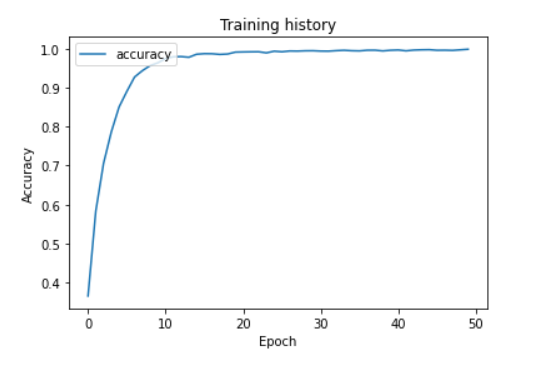
> fig 1.1. Biểu đồ độ chính xác trên tập huấn luyện của AlexNet



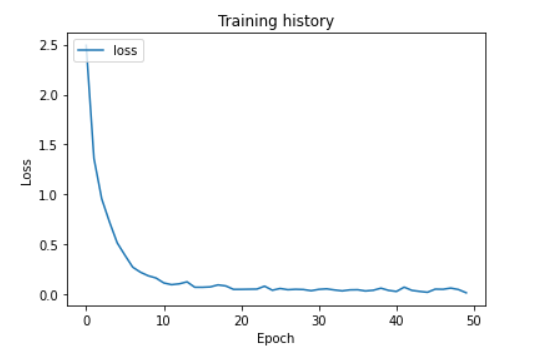
> Fig 1.2: Biểu đồ hàm mất mát trên dữ liệu huấn luyện của AlexNet


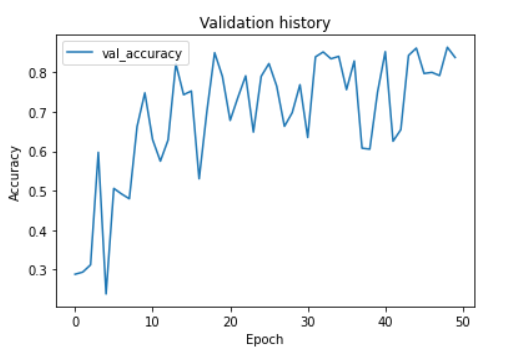
> FIg 1.3: Biểu đồ độ chính xác trên tập kiểm thử của AlexNet

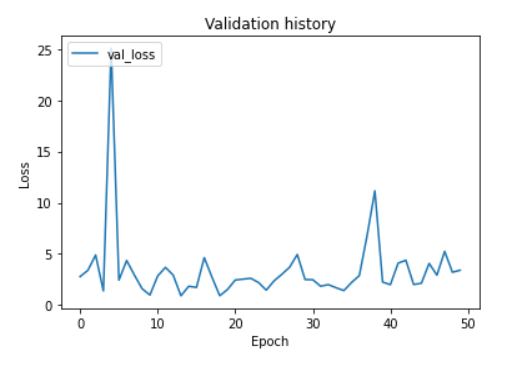
> Fig 1.4: Biểu đồ hàm mất mát trên tập kiểm thử của AlexNet

2. Confusion matrix:


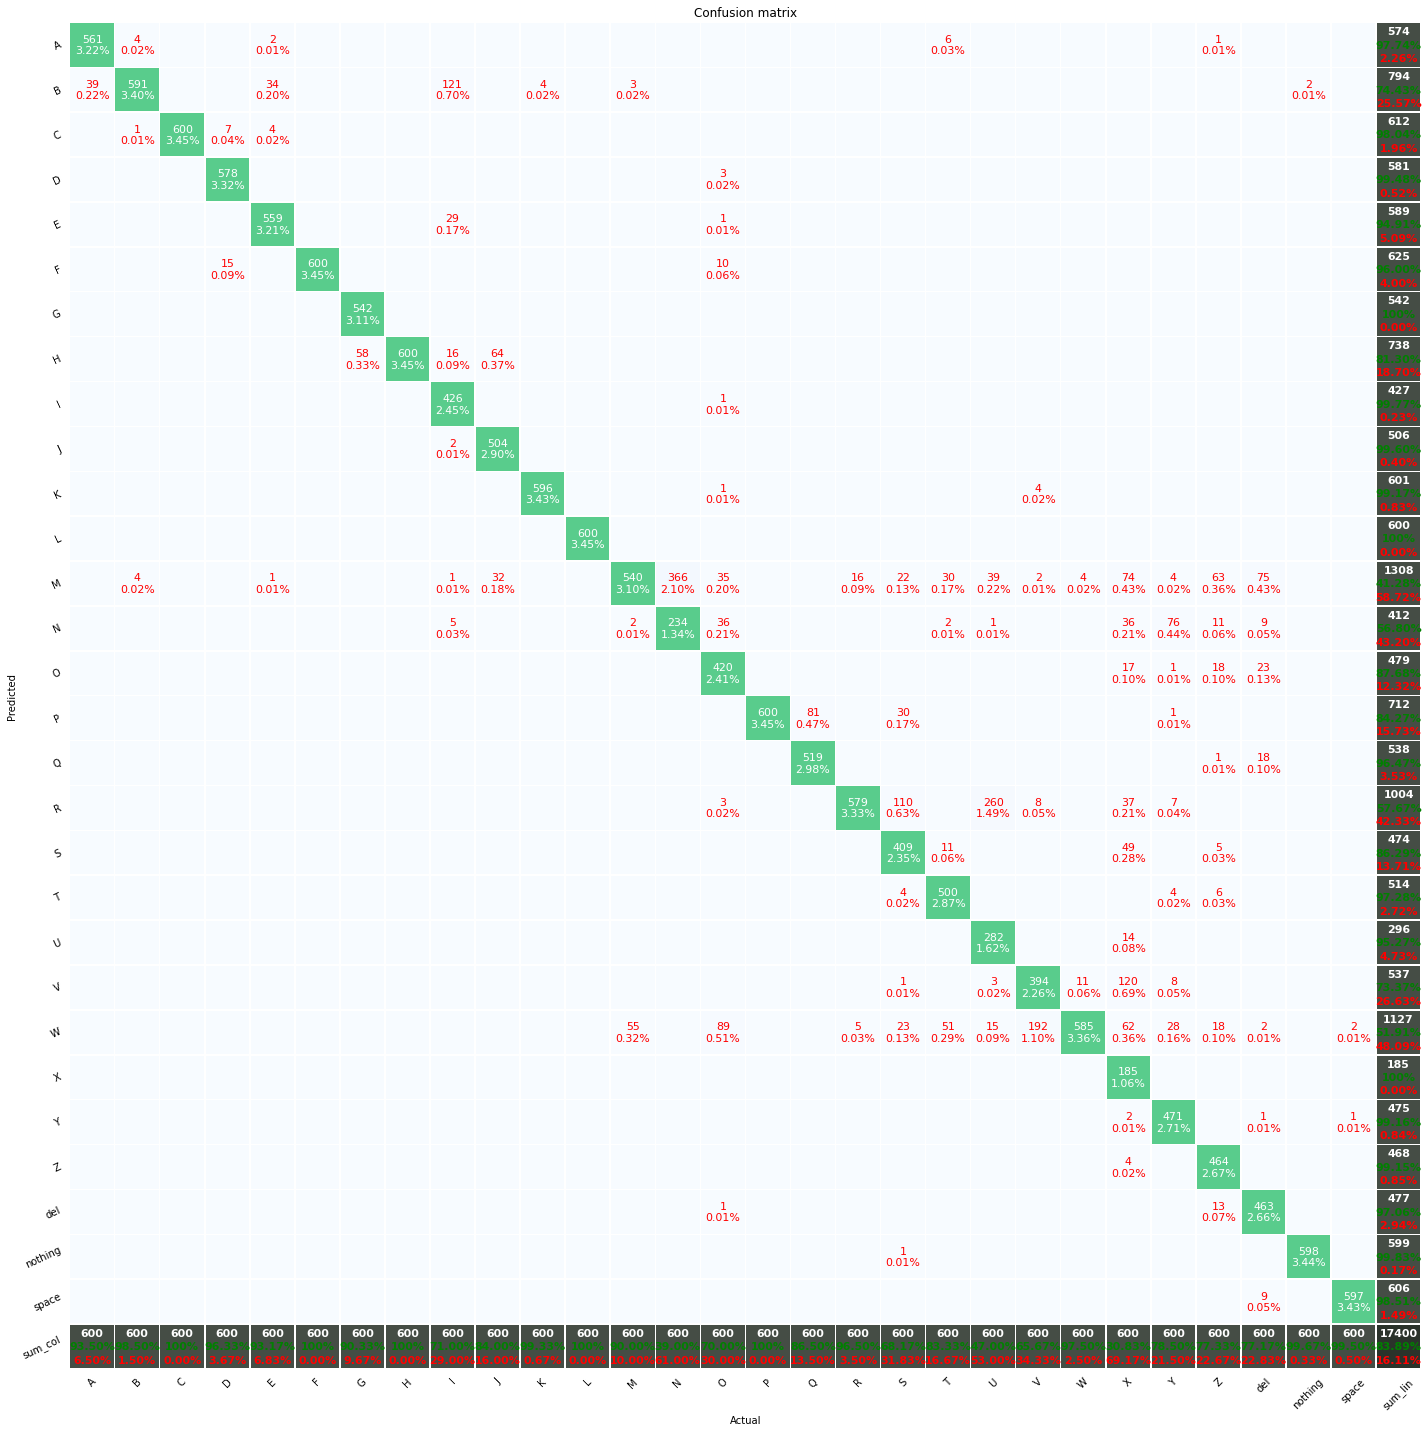

3. Đánh giá AlexNet trên tập dữ liệu qua Precision, Recall, F1-score

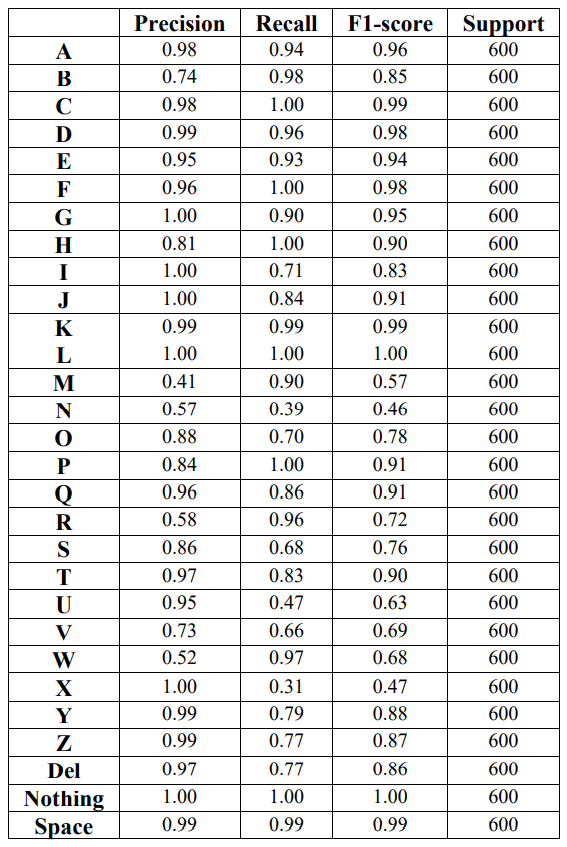

### **Kết quả đánh giá với mô hình ResNet**:

```
Epoch 1/50
543/543 [==============================] - 407s 738ms/step - loss: 1.7758 - accuracy: 0.5398 - val_loss: 3.6596 - val_accuracy: 0.2682
Epoch 2/50
543/543 [==============================] - 401s 738ms/step - loss: 0.1628 - accuracy: 0.9458 - val_loss: 3.2758 - val_accuracy: 0.4771
Epoch 3/50
543/543 [==============================] - 401s 739ms/step - loss: 0.0631 - accuracy: 0.9796 - val_loss: 4.3084 - val_accuracy: 0.3728
Epoch 4/50
543/543 [==============================] - 401s 738ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 1.1335 - val_accuracy: 0.7768
Epoch 5/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 2.1281 - val_accuracy: 0.6787
Epoch 6/50
543/543 [==============================] - 399s 735ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.8868 - val_accuracy: 0.8181
Epoch 7/50
543/543 [==============================] - 399s 735ms/step - loss: 0.0329 - accuracy: 0.9900 - val_loss: 1.2637 - val_accuracy: 0.7654
Epoch 8/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.5758 - val_accuracy: 0.9046
Epoch 9/50
543/543 [==============================] - 398s 732ms/step - loss: 0.0169 - accuracy: 0.9949 - val_loss: 0.4461 - val_accuracy: 0.9134
Epoch 10/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 4.0734 - val_accuracy: 0.4436
Epoch 11/50
543/543 [==============================] - 399s 735ms/step - loss: 0.0212 - accuracy: 0.9939 - val_loss: 2.0304 - val_accuracy: 0.6539
Epoch 12/50
543/543 [==============================] - 400s 737ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 1.5164 - val_accuracy: 0.7253
Epoch 13/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0183 - accuracy: 0.9946 - val_loss: 0.4143 - val_accuracy: 0.9090
Epoch 14/50
543/543 [==============================] - 398s 732ms/step - loss: 0.0108 - accuracy: 0.9969 - val_loss: 0.6819 - val_accuracy: 0.8660
Epoch 15/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0135 - accuracy: 0.9957 - val_loss: 0.6033 - val_accuracy: 0.8888
Epoch 16/50
543/543 [==============================] - 401s 737ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.5317 - val_accuracy: 0.8928
Epoch 17/50
543/543 [==============================] - 401s 737ms/step - loss: 0.0094 - accuracy: 0.9973 - val_loss: 0.5154 - val_accuracy: 0.8998
Epoch 18/50
543/543 [==============================] - 401s 738ms/step - loss: 0.0134 - accuracy: 0.9964 - val_loss: 0.9595 - val_accuracy: 0.8048
Epoch 19/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.5641 - val_accuracy: 0.8885
Epoch 20/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 2.8959 - val_accuracy: 0.4927
Epoch 21/50
543/543 [==============================] - 399s 735ms/step - loss: 0.0121 - accuracy: 0.9964 - val_loss: 0.6944 - val_accuracy: 0.8507
Epoch 22/50
543/543 [==============================] - 400s 736ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.6198 - val_accuracy: 0.9058
Epoch 23/50
543/543 [==============================] - 400s 737ms/step - loss: 2.7518e-04 - accuracy: 0.9999 - val_loss: 0.3442 - val_accuracy: 0.9258
Epoch 24/50
543/543 [==============================] - 399s 735ms/step - loss: 7.9610e-05 - accuracy: 1.0000 - val_loss: 0.3491 - val_accuracy: 0.9264
Epoch 25/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0211 - accuracy: 0.9941 - val_loss: 0.3901 - val_accuracy: 0.9163
Epoch 26/50
543/543 [==============================] - 399s 734ms/step - loss: 2.1645e-04 - accuracy: 0.9999 - val_loss: 0.3918 - val_accuracy: 0.9234
Epoch 27/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.5508 - val_accuracy: 0.8874
Epoch 28/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 0.3385 - val_accuracy: 0.9289
Epoch 29/50
543/543 [==============================] - 400s 736ms/step - loss: 0.0105 - accuracy: 0.9975 - val_loss: 0.6578 - val_accuracy: 0.8692
Epoch 30/50
543/543 [==============================] - 399s 735ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.4048 - val_accuracy: 0.9069
Epoch 31/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 2.0395 - val_accuracy: 0.6240
Epoch 32/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.4225 - val_accuracy: 0.9184
Epoch 33/50
543/543 [==============================] - 399s 734ms/step - loss: 5.6338e-05 - accuracy: 1.0000 - val_loss: 0.4129 - val_accuracy: 0.9254
Epoch 34/50
543/543 [==============================] - 398s 733ms/step - loss: 8.0525e-06 - accuracy: 1.0000 - val_loss: 0.4145 - val_accuracy: 0.9259
Epoch 35/50
543/543 [==============================] - 398s 733ms/step - loss: 6.5898e-06 - accuracy: 1.0000 - val_loss: 0.4168 - val_accuracy: 0.9258
Epoch 36/50
543/543 [==============================] - 398s 733ms/step - loss: 4.0201e-06 - accuracy: 1.0000 - val_loss: 0.4232 - val_accuracy: 0.9264
Epoch 37/50
543/543 [==============================] - 400s 735ms/step - loss: 2.4955e-06 - accuracy: 1.0000 - val_loss: 0.4226 - val_accuracy: 0.9274
Epoch 38/50
543/543 [==============================] - 398s 733ms/step - loss: 1.9362e-06 - accuracy: 1.0000 - val_loss: 0.4393 - val_accuracy: 0.9261
Epoch 39/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0181 - accuracy: 0.9952 - val_loss: 0.4383 - val_accuracy: 0.9167
Epoch 40/50
543/543 [==============================] - 398s 733ms/step - loss: 8.2969e-05 - accuracy: 1.0000 - val_loss: 0.4518 - val_accuracy: 0.9236
Epoch 41/50
543/543 [==============================] - 398s 732ms/step - loss: 7.8397e-06 - accuracy: 1.0000 - val_loss: 0.4343 - val_accuracy: 0.9251
Epoch 42/50
543/543 [==============================] - 398s 733ms/step - loss: 8.7533e-06 - accuracy: 1.0000 - val_loss: 0.4356 - val_accuracy: 0.9258
Epoch 43/50
543/543 [==============================] - 399s 735ms/step - loss: 3.9609e-06 - accuracy: 1.0000 - val_loss: 0.4250 - val_accuracy: 0.9273
Epoch 44/50
543/543 [==============================] - 400s 737ms/step - loss: 8.0970e-06 - accuracy: 1.0000 - val_loss: 0.4653 - val_accuracy: 0.9255
Epoch 45/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0137 - accuracy: 0.9964 - val_loss: 5.1069 - val_accuracy: 0.7511
Epoch 46/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.3862 - val_accuracy: 0.9280
Epoch 47/50
543/543 [==============================] - 399s 734ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.3936 - val_accuracy: 0.9228
Epoch 48/50
543/543 [==============================] - 399s 734ms/step - loss: 7.6103e-05 - accuracy: 1.0000 - val_loss: 0.8801 - val_accuracy: 0.8639
Epoch 49/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0083 - accuracy: 0.9979 - val_loss: 0.4508 - val_accuracy: 0.9211
Epoch 50/50
543/543 [==============================] - 398s 733ms/step - loss: 0.0076 - accuracy: 0.9983 - val_loss: 0.4078 - val_accuracy: 0.9130
Processing time: 21117.64777302742
```

`Accuracy for train images: 98.68 %`

`Accuracy for test images: 91.36 %`

1. Biểu đồ đánh giá:

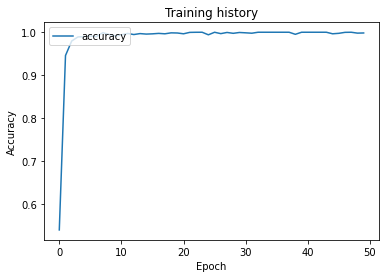
> fig 2.1. Biểu đồ độ chính xác trên tập huấn luyện của ResNet50

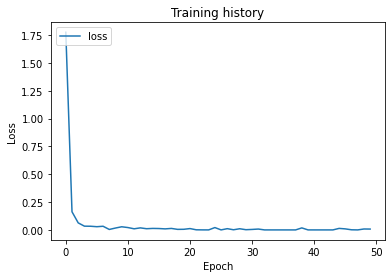
> fig 2.2. Biểu đồ hàm mất mát trên tập huấn luyện của ResNet50

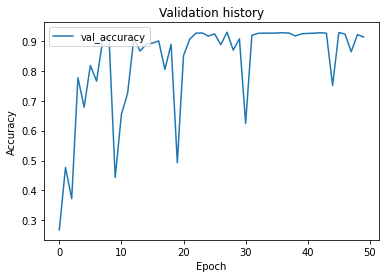

> fig 2.3. Biểu đồ độ chính xác trên tập đánh giá của ResNet50


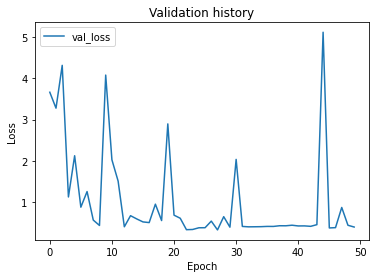
> fig 2.4. Biểu đồ hàm mất mát trên tập đánh giá của ResNet50

2. Confusion matrix:


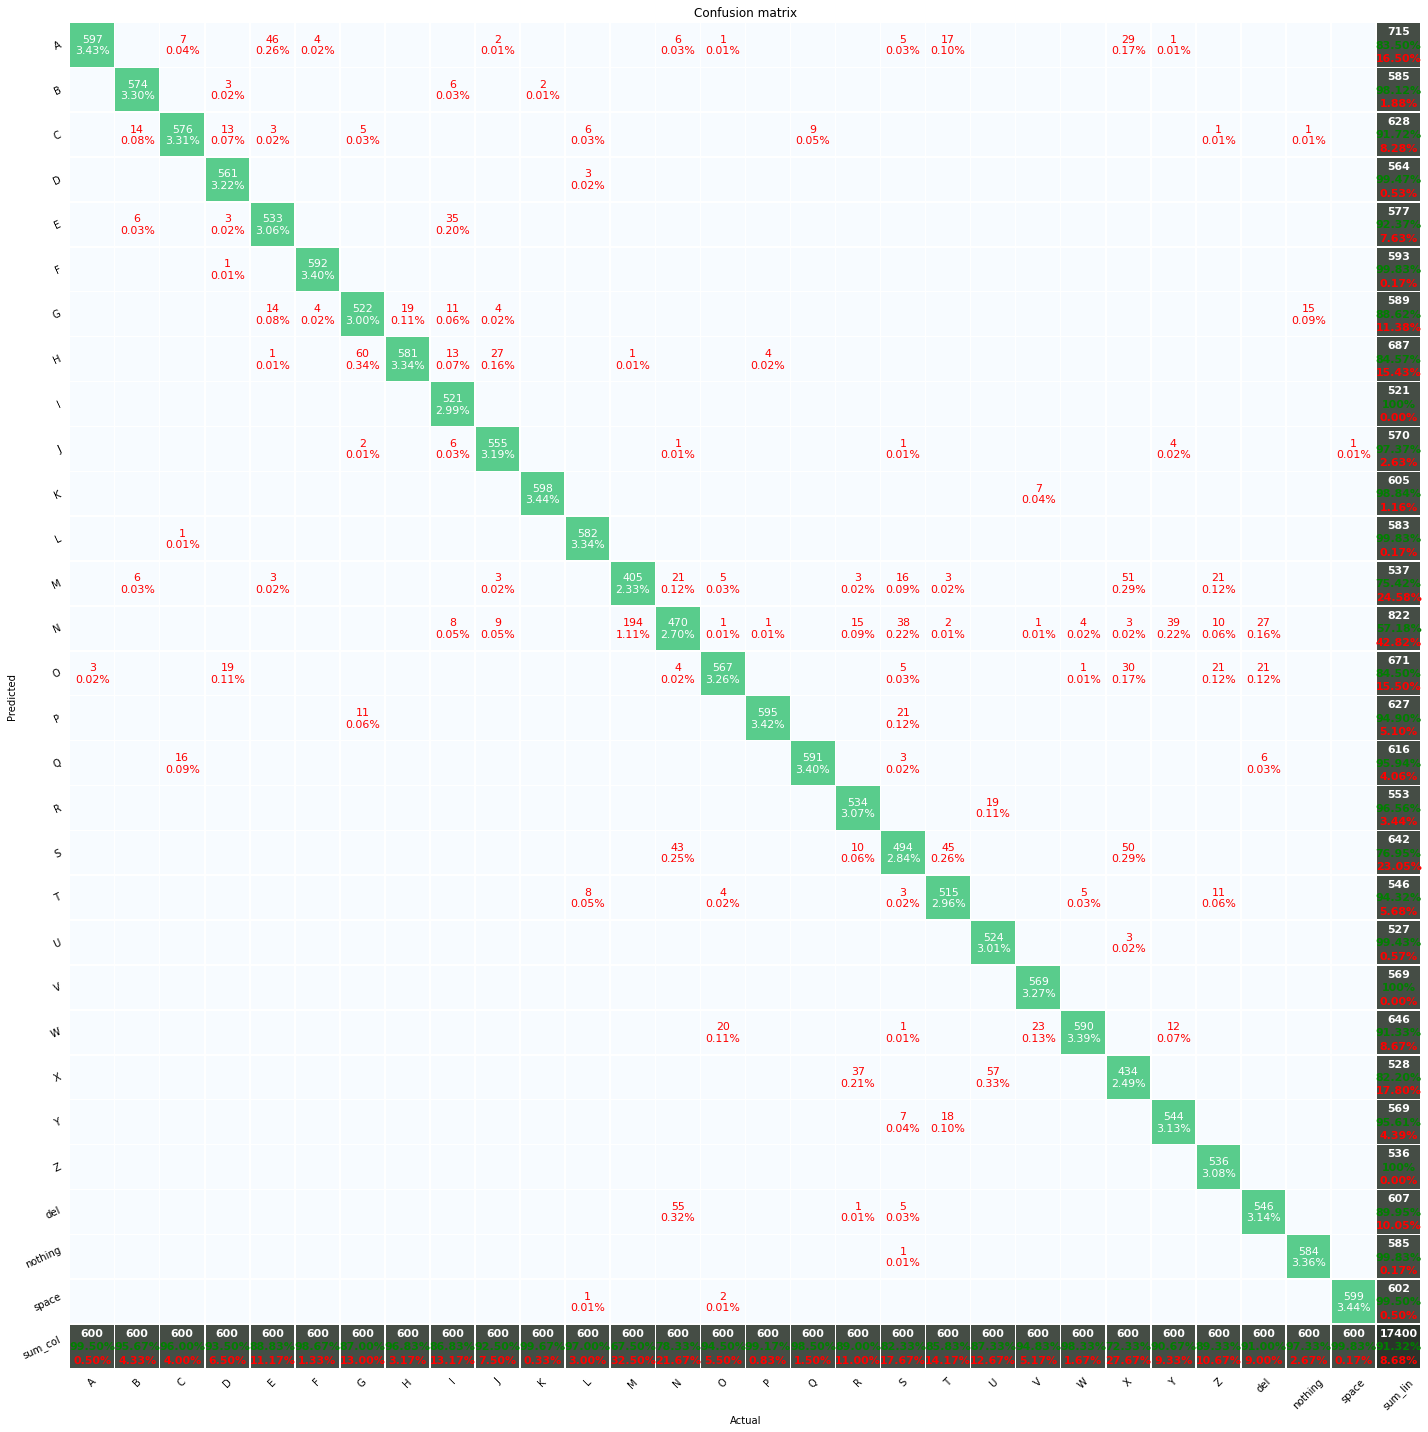

3. Đánh giá ResNet50 trên tập dữ liệu qua Precision, Recall, F1-score

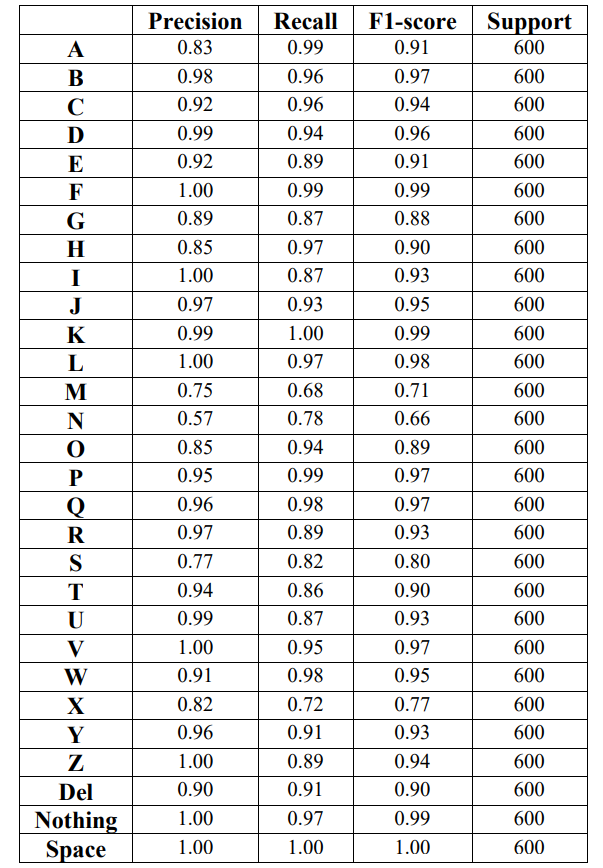

### So sánh 2 mô hình qua độ chính xác và thời gian huấn luyện:

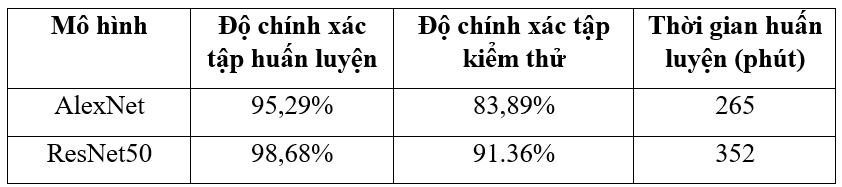

###  Hiện thực kết quả bằng Videocapture
https://drive.google.com/file/d/1v9vHtut3ngKZumWRgJkHoEL4Z2x39djn/view?usp=sharing

Notebook của 2 mô hình
- AlexNet: https://www.kaggle.com/baoanh07/model-alexnet
- ResNet: https://www.kaggle.com/baoanh07/resnet50

# **Kết luận - Đề nghị**

## **Kết luận**

- Trong mạng neural, mô hình mạng neural tích chập (CNN) là 1 trong những mô hình để nhận dạng và phân loại hình ảnh. Trong đó, xác định đối tượng, nhận dạng và phân loại hình ảnh là một trong số những lĩnh vực mà CNN được sử dụng rộng rãi.

- Các ảnh ngôn ngữ kí hiệu bước đầu được dự đoán bằng các mô hình học sâu, đầu vào là một ảnh cử chỉ tay và được dự đoán có độ chính xác cao lên đến 91%, việc phân loại được ngôn ngữ kí hiệu các mô hình này có thể được sử dụng trong cuộc sống dành cho những người khiếm thính và nói, giúp mọi người có thể dễ dàng giao tiếp giữa họ và mọi người xung quanh.  

## **Kiến nghị**

### **Hạn chế**

- Mô hình dự đoán còn vài lớp có điểm precision thấp, nhận dạng trùng lập với các ngôn ngữ kí hiệu có đặc trưng các điểm ảnh gần giống nhau.
- Chưa tìm ra được giải pháp xử lý ảnh đầu vào tối ưu hơn, tăng độ chính xác cho quá trình dự đoán.

### Hướng phát triển

- Tìm được hướng xử lý ảnh đầu vào tối ưu hơn, huấn luyện mô hình với nhiều dữ liệu, cải thiện độ chính xác và các điểm như precision, recall,..
- Tiến hành phát triển mô hình để có thể phân loại đầu vào là 1 video trên khoảng thời gian thực

**Tài liệu tham khảo**
- [1] MK Gurucharan; Basic CNN Architecture: Explaining 5 Layers of Convolutional Neural Network
https://www.upgrad.com/blog/basic-cnn-architecture/
- [2] Alex Krizhevsky.; Ilya Sutskever Geoffrey.; E. Hinton. ImageNet Classification with Deep Convolutional Neural Networks
https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf
- [3] Kaiming He; Xiangyu Zhang; Shaoqing Ren; Jian Sun; Deep Residual Learning for Image Recognition
https://arxiv.org/pdf/1512.03385.pdf
- [4] Adam: A Method for Stochastic Optimization
 https://arxiv.org/abs/1412.6980
- Tensorflow:  https://www.tensorflow.org/tutorials/quickstart/beginner
- keras: https://keras.io/getting_started/
- OpenCv: https://www.geeksforgeeks.org/opencv-overview/
- pillow: https://pillow.readthedocs.io/en/stable/reference/Image.html




